#  Сравнительный анализ активности пользователей сервиса Яндекс Книги из Москвы и Санкт-Петербурга.


### Цели и задачи проекта

<b>Цель</b>: Провести исследовательский анализ сервиса Яндекс Книги с проверкой гипотез.

<b>Задачи</b>:
1. Загрузить данные и познакомиться с их содержимым.
2. Провести предобработку данных.
3. Провести исследовательский анализ данных и проверить гипотезу;
4. Сформулировать выводы по проведённому анализу.

### Описание данных

Для анализа используем датасет с данными о чтении и прослушивании контента в сервисе Яндекс Книги. Данные представлены за период с 1 сентября по 11 декабря 2024 года. Данные состоят из датасета:
- `yandex_knigi_data.csv` — содержит данные пользователей из Москвы и Санкт-Петербурга c суммой часов их активности;

## Содержимое проекта
1. Загрузка данных и знакомство с ними.
2. Проверка гипотезы в Python.
3. Аналитическая записка.
---

## 1. Загрузка данных и знакомство с ними

Импортируем все необходимы библиотеки и загрузим данные пользователей из Москвы и Санкт-Петербурга c их активностью (суммой часов чтения и прослушивания) из файла `/datasets/yandex_knigi_data.csv`. Данные датасета сохраним переменной df.

In [1]:
# Импортируем библиотеки
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats

In [2]:
# Выгружаем данные в переменную df
df = pd.read_csv('https://code.s3.yandex.net/datasets/yandex_knigi_data.csv')

Познакомимся с данными — выведем первые строки методом head(), а информацию о датафрейме методом info():

In [3]:
# Выводим первые строки датафрейма на экран
df.head()

,Unnamed: 0,city,puid,hours
0,0,Москва,9668,26.167776
1,1,Москва,16598,82.111217
2,2,Москва,80401,4.656906
3,3,Москва,140205,1.840556
4,4,Москва,248755,151.326434


In [4]:
# Выводим информацию о датафрейме
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8784 entries, 0 to 8783
Data columns (total 4 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  8784 non-null   int64  
 1   city        8784 non-null   object 
 2   puid        8784 non-null   int64  
 3   hours       8784 non-null   float64
dtypes: float64(1), int64(2), object(1)
memory usage: 274.6+ KB


Датасет содержит 8784 записи. Пропуски отсутствуют во всех столбцах. Типы данных выбраны корректно. 

Проверим данные на наличие явных и неявных дубликатов.

In [5]:
# Проверка на явные дубликаты
ex_duplicates = df.duplicated().sum()
# Вывод результатов
print("Явные дубликаты:")
print(ex_duplicates)

Явные дубликаты:
0


Явных дубликатов нет.  Поскольку тесты независимые, то пользователи не должны пересекаться между группами. Сделаем проверку на наличие неявных дубликатов в столбце `puid`

In [6]:
# Количество дубликатов
duplicates_count = df['puid'].duplicated().sum()
print(f"Число явных дубликатов в puid: {duplicates_count}")

Число явных дубликатов в puid: 244


In [7]:
temp = df.copy()

In [8]:
# Удалим неявные дубликаты
df = df.drop_duplicates(subset=['puid'])

In [9]:
# Проверим сколько удалено строк датасета
a, b = len(temp), len(df)
print(" Было строк в исходном датасете", a,
      '\n', "Осталось строк в датасете после обработки", b,
      '\n', "Удалено строк в датасете после обработки", a-b,
      '\n', "Процент потерь", round((a-b)/a*100, 2))

 Было строк в исходном датасете 8784 
 Осталось строк в датасете после обработки 8540 
 Удалено строк в датасете после обработки 244 
 Процент потерь 2.78


Сравним размеры групп, их статистики и распределение.

In [10]:
# Размеры групп по городам
group_sizes = df['city'].value_counts()
print("Размеры групп:")
print(group_sizes)

Размеры групп:
Москва             6234
Санкт-Петербург    2306
Name: city, dtype: int64


In [11]:
# Статистика по каждому городу
city_stats = df.groupby('city')['hours'].describe().T
print("Описательная статистика по часам активности:\n", city_stats)

Описательная статистика по часам активности:
 city        Москва  Санкт-Петербург
count  6234.000000      2306.000000
mean     10.881092        11.264433
std      36.851683        39.831755
min       0.000018         0.000025
25%       0.059903         0.060173
50%       0.924498         0.875355
75%       5.939972         6.138424
max     857.209373       978.764775


Размер выборки:
- Москва: 6234 пользователей
- Санкт-Петербург: 2306 пользователей

Среднее время на платформе:
- Москва: 10.88 часов
- Санкт-Петербург: 11.26 часов

Медианное время (более устойчиво к выбросам):
- Москва: 0.92 часа
- Санкт-Петербург: 0.87 часа

Разброс данных (стандартное отклонение):
- Москва: 36.85
- Санкт-Петербург: 39.83 (разброс больше)

Максимальные значения (самые активные пользователи):
- Москва: 857.2 часа
- Санкт-Петербург: 978.8 часа

Распределение пользователей по часам активности похоже, но в Санкт-Петербурге среднее значение немного выше, а разброс данных больше. Посмотрим на визуализацию распределения активности

In [12]:
# Отфильтруем пользователей из Москвы и Санкт-Петербурга
df_moscow = df[df["city"] == "Москва"]
df_spb = df[df["city"] == "Санкт-Петербург"]

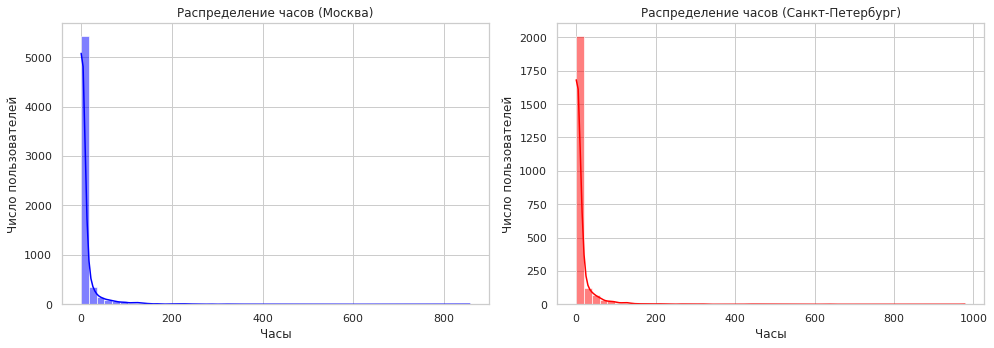

In [13]:
# Установка стиля
sns.set(style="whitegrid")

# Создание графиков
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Гистограммы распределения часов
sns.histplot(df_moscow["hours"], bins=50, kde=True, color="blue", ax=axes[0])
axes[0].set_title("Распределение часов (Москва)")
axes[0].set_xlabel("Часы")
axes[0].set_ylabel("Число пользователей")

sns.histplot(df_spb["hours"], bins=50, kde=True, color="red", ax=axes[1])
axes[1].set_title("Распределение часов (Санкт-Петербург)")
axes[1].set_xlabel("Часы")
axes[1].set_ylabel("Число пользователей")

plt.tight_layout()
plt.show()

Визуально на гистограммах видно, что большинство пользователей проводят мало времени на платформе, но есть небольшая группа супер-активных пользователей. Сильная асимметрия и длинный хвост вправо. В целом это нормально для подобных данных. Всегда будут пользователи или клиенты, кто больше смотрит, читает, покупает и тп.

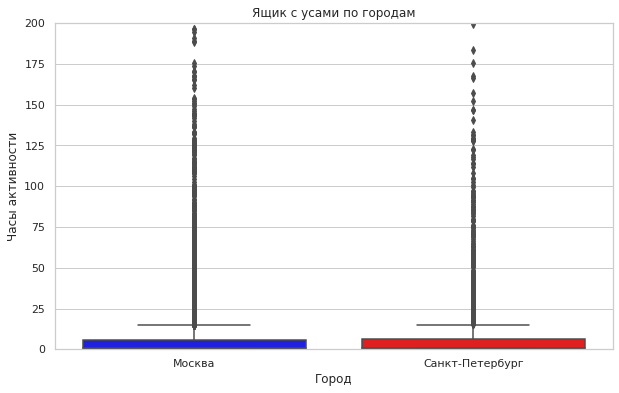

In [14]:
# Создание боксплота
plt.figure(figsize=(10, 6))
sns.boxplot(data=df, x='city', y='hours', palette=["blue", "red"])
plt.title('Ящик с усами по городам')
plt.xlabel('Город')
plt.ylabel('Часы активности')
plt.ylim(0, 200)
plt.show()

На боксплоте есть значительные выбросы. Очистим данные от выбросов. Используем метод межквартильного размаха (IQR)

In [15]:
# Функция для очистки данных от выбросов по IQR
def remove_outliers(df, column):
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    return df[(df[column] >= lower_bound) & (df[column] <= upper_bound)]

# Очистка данных
df_moscow_clean = remove_outliers(df_moscow, "hours")
df_spb_clean = remove_outliers(df_spb, "hours")

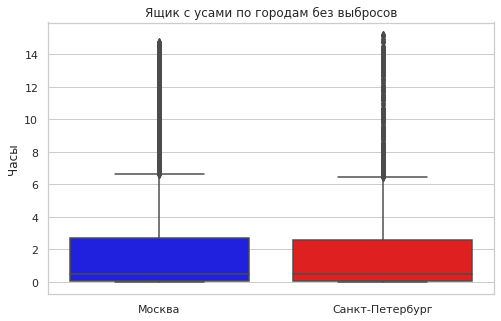

In [16]:
# Создание боксплота без выбросов
plt.figure(figsize=(8, 5))
sns.boxplot(data=[df_moscow_clean["hours"], df_spb_clean["hours"]], palette=["blue", "red"])
plt.xticks([0, 1], ["Москва", "Санкт-Петербург"])
plt.title("Ящик с усами по городам без выбросов")
plt.ylabel("Часы")
plt.show()

Проведем проверку нормальности распределения на очищенных данных

In [17]:
from scipy.stats import shapiro

# Проверка нормальности распределения на очищенных данных (тест Шапиро-Уилка)
shapiro_moscow_clean = shapiro(df_moscow_clean["hours"].sample(1000, random_state=1))
shapiro_spb_clean = shapiro(df_spb_clean["hours"].sample(1000, random_state=1))

shapiro_moscow_clean, shapiro_spb_clean

(ShapiroResult(statistic=0.6866006851196289, pvalue=1.837079865954406e-39),
 ShapiroResult(statistic=0.6677765846252441, pvalue=2.7139648007810895e-40))

Оба значения крайне малы, что говорит о сильном отклонении от нормальности. Тест Шапиро-Уилка подтвердил, что распределение пользователей по количеству часов на платформе не является нормальным. 

## 2. Проверка гипотезы в Python

Гипотеза звучит так: пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг в приложении, чем пользователи из Москвы. Попробуем статистически это доказать, используя одностороннюю проверку гипотезы с двумя выборками:

- Нулевая гипотеза H₀: Средняя активность пользователей в Санкт-Петербурге не выше, чем средняя активность пользователей в Москве

- Альтернативная гипотеза H₁: Средняя активность пользователей в Санкт-Петербурге выше, чем средняя активность пользователей в Москве

In [18]:
from scipy.stats import mannwhitneyu

alpha = 0.05
# Односторонний тест Манна-Уитни (непараметрический тест для двух независимых выборок)
test = mannwhitneyu( df_spb_clean["hours"], df_moscow_clean["hours"], alternative="greater")

if test.pvalue > alpha:
    print(f'pvalue={test.pvalue} > {alpha}')
    print('Нулевая гипотеза находит подтверждение: Средняя активность пользователей в Санкт-Петербурге не выше, чем средняя активность пользователей в Москве')
else:
    print(f'pvalue={test.pvalue} > {alpha}')
    print('Нулевая гипотеза не находит подтверждение: Средняя активность пользователей в Санкт-Петербурге больше, и это различие статистически значимо.')

pvalue=0.8323458940489117 > 0.05
Нулевая гипотеза находит подтверждение: Средняя активность пользователей в Санкт-Петербурге не выше, чем средняя активность пользователей в Москве


Результаты теста Манна-Уитни:

Так как p>0.05, мы не можем отвергнуть нулевую гипотезу.
То есть, нет статистически значимого доказательства, что пользователи из Санкт-Петербурга проводят за книгами больше времени, чем пользователи из Москвы.

## 3. Аналитическая записка



Для проверки гипотезы о том, что пользователи из Санкт-Петербурга проводят в среднем больше времени за чтением и прослушиванием книг, чем пользователи из Москвы, был выбран U-тест Манна-Уитни. Этот тест используется для сравнения двух независимых выборок, когда данные не подчиняются нормальному распределению.

Уровень статистической значимости был установлен на 5% (0.05), что является стандартным значением в статистических исследованиях.

После удаления выбросов из данных тест Манна-Уитни дал следующие результаты: p-value: 0.832. Так как p-value превышает установленный уровень значимости (0.832 > 0.05), мы не можем отвергнуть нулевую гипотезу. Это означает, что нет статистически значимого подтверждения тому, что пользователи из Санкт-Петербурга проводят больше времени за чтением и прослушиванием книг, чем пользователи из Москвы.

Возможные причины полученных результатов

Похожие привычки пользователей. Несмотря на возможные различия между городами, пользователи могут демонстрировать схожее поведение в плане потребления контента. Это может быть связано с общей популярностью платформы и схожими паттернами использования.

Высокая вариативность данных. В обеих выборках присутствуют пользователи с очень разными уровнями активности (от нескольких часов до сотен), что делает разницу между средними значениями менее выраженной и затрудняет получение статистически значимого результата.
